# Assignment 2 - Wind profiles, shear, and stability

## Import

In [15]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import linregress, gaussian_kde

import math

## Data

In [16]:
Hoe = pd.read_csv("Hoevsoere2008.csv")

In [17]:
Hoe

,name,u_star_2d,wsc,dir_metmast_60m,T_10m,wsp_metmast_10m,wsp_metmast_40m,wsp_metmast_60m,wsp_metmast_80m,wsp_metmast_100m
0,200801010000,0.152,-0.0074,41.6726,2.97165,2.59215,4.68932,5.37364,5.95689,6.46508
1,200801010010,0.123,-0.0087,51.6034,2.97663,3.98903,5.54254,5.98760,6.53404,6.97209
2,200801010020,0.134,-0.0104,52.6452,2.76732,4.15521,6.20265,6.80962,7.22990,7.52415
3,200801010030,0.135,-0.0086,48.7002,2.66463,3.67854,5.77822,6.49033,7.04092,7.39945
4,200801010040,0.052,-0.0014,45.6730,2.45688,2.94888,5.07810,5.83270,6.36725,6.76746
...,...,...,...,...,...,...,...,...,...,...
44862,200812312310,0.403,-0.0456,335.3680,6.16087,7.96938,10.76900,11.77440,12.37210,12.60200
44863,200812312320,0.422,-0.0453,337.1350,6.15687,7.98717,10.55960,11.69550,12.66640,13.09670
44864,200812312330,0.388,-0.0408,334.9430,6.22002,8.27035,11.16080,12.22490,12.95410,13.23880
44865,200812312340,0.341,-0.0381,333.4440,6.22807,7.86902,10.57440,11.56800,12.06370,12.29320


In [18]:
Hoe.rename(columns={'name': 'timestamp'}, inplace=True)

## Task 1

In [19]:
# Karman constant
k = 0.4
# Gravity
g = 9.81

Change surface layer temp (T_10) to kelvin

In [20]:
Hoe["T_10m_K"] = Hoe["T_10m"] + 273.15

In [21]:
Hoe["1/L"] = ((k*g)/Hoe["T_10m_K"])*((-Hoe["wsc"])/((Hoe["u_star_2d"])**3))

In [22]:
Hoe

,timestamp,u_star_2d,wsc,dir_metmast_60m,T_10m,wsp_metmast_10m,wsp_metmast_40m,wsp_metmast_60m,wsp_metmast_80m,wsp_metmast_100m,T_10m_K,1/L
0,200801010000,0.152,-0.0074,41.6726,2.97165,2.59215,4.68932,5.37364,5.95689,6.46508,276.12165,0.029945
1,200801010010,0.123,-0.0087,51.6034,2.97663,3.98903,5.54254,5.98760,6.53404,6.97209,276.12663,0.066439
2,200801010020,0.134,-0.0104,52.6452,2.76732,4.15521,6.20265,6.80962,7.22990,7.52415,275.91732,0.061471
3,200801010030,0.135,-0.0086,48.7002,2.66463,3.67854,5.77822,6.49033,7.04092,7.39945,275.81463,0.049729
4,200801010040,0.052,-0.0014,45.6730,2.45688,2.94888,5.07810,5.83270,6.36725,6.76746,275.60688,0.141761
...,...,...,...,...,...,...,...,...,...,...,...,...
44862,200812312310,0.403,-0.0456,335.3680,6.16087,7.96938,10.76900,11.77440,12.37210,12.60200,279.31087,0.009788
44863,200812312320,0.422,-0.0453,337.1350,6.15687,7.98717,10.55960,11.69550,12.66640,13.09670,279.30687,0.008469
44864,200812312330,0.388,-0.0408,334.9430,6.22002,8.27035,11.16080,12.22490,12.95410,13.23880,279.37002,0.009811
44865,200812312340,0.341,-0.0381,333.4440,6.22807,7.86902,10.57440,11.56800,12.06370,12.29320,279.37807,0.013496


Read page 93

Probaility density function

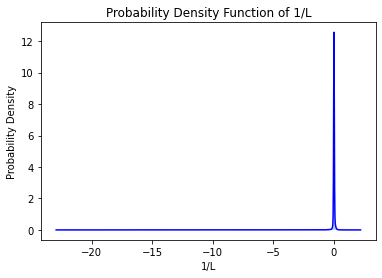

In [23]:
# Extract the data
data = Hoe['1/L'].dropna()  # Drop any NaN values if they exist

# Create a Gaussian KDE model
kde = gaussian_kde(data)

# Create a range of values for plotting the PDF
x_vals = np.linspace(data.min(), data.max(), 1000)

# Evaluate the PDF for the range of values
pdf_vals = kde(x_vals)

# Plot the PDF
plt.plot(x_vals, pdf_vals, color='blue')
plt.fill_between(x_vals, pdf_vals, alpha=0.3)

# Add labels and a title
plt.xlabel('1/L')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of 1/L')

# Show the plot
plt.show()

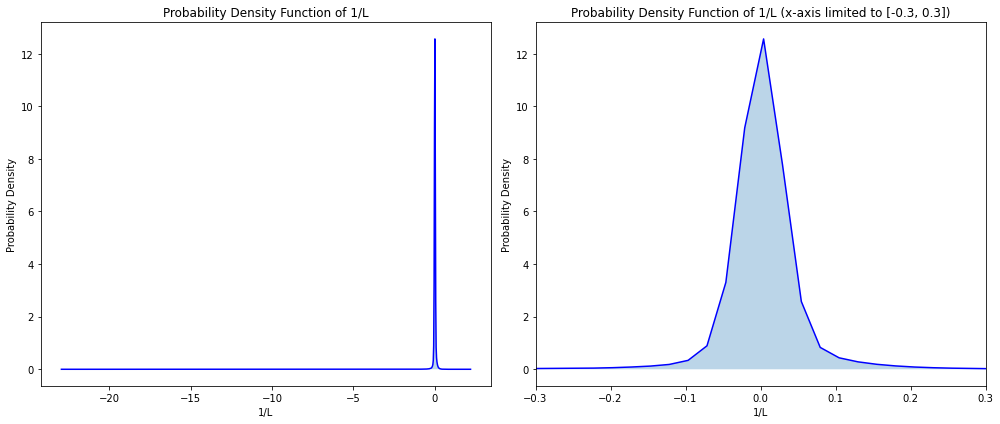

In [24]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde

# Assuming 'Hoe' DataFrame is defined and '1/L' column exists

# Extract the data
data = Hoe['1/L'].dropna()  # Drop any NaN values if they exist

# Create a Gaussian KDE model
kde = gaussian_kde(data)

# Create a range of values for plotting the PDF
x_vals = np.linspace(data.min(), data.max(), 1000)
pdf_vals = kde(x_vals)

# Create a figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))  # 1 row, 2 columns, figure size (width, height)

# Plot the first PDF (full range)
ax1.plot(x_vals, pdf_vals, color='blue')
ax1.fill_between(x_vals, pdf_vals, alpha=0.3)
ax1.set_xlabel('1/L')
ax1.set_ylabel('Probability Density')
ax1.set_title('Probability Density Function of 1/L')

# Plot the second PDF (restricted x-axis to [-1, 1])
ax2.plot(x_vals, pdf_vals, color='blue')
ax2.fill_between(x_vals, pdf_vals, alpha=0.3)
ax2.set_xlim(-0.3, 0.3)  # Limit x-axis to [-1, 1]
ax2.set_xlabel('1/L')
ax2.set_ylabel('Probability Density')
ax2.set_title('Probability Density Function of 1/L (x-axis limited to [-0.3, 0.3])')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the figure
plt.show()


## Task 2

In [25]:
#Easter wind filter
filter_2 = (Hoe["dir_metmast_60m"] >= 70) & (Hoe["dir_metmast_60m"] <= 110)

#Neutral conditions filter
filter_1 = Hoe["1/L"].abs() < 0.0005

filtered_Hoe = Hoe[filter_1 & filter_2]

In [26]:
filtered_Hoe

,timestamp,u_star_2d,wsc,dir_metmast_60m,T_10m,wsp_metmast_10m,wsp_metmast_40m,wsp_metmast_60m,wsp_metmast_80m,wsp_metmast_100m,T_10m_K,1/L
204,200801021200,0.409,-0.0009,75.3320,3.938150,5.73629,6.72659,7.21169,7.64671,8.03121,277.088150,0.000186
205,200801021210,0.353,0.0006,77.1807,4.013850,6.02018,7.29854,7.78025,8.21616,8.56211,277.163850,-0.000193
206,200801021220,0.464,-0.0006,81.0822,4.051890,6.47754,7.64026,7.96439,8.27534,8.61539,277.201890,0.000085
207,200801021230,0.368,-0.0001,83.6215,4.056790,6.38485,7.64065,8.23059,8.47128,8.78089,277.206790,0.000028
216,200801021400,0.438,-0.0013,81.2734,3.916900,6.57345,7.85059,8.41318,8.86007,9.20216,277.066900,0.000219
...,...,...,...,...,...,...,...,...,...,...,...,...
44592,200812291020,0.293,-0.0004,100.9610,1.765120,3.98454,4.76040,5.23101,5.67885,6.11032,274.915120,0.000227
44594,200812291040,0.214,0.0003,103.7000,1.801660,4.23295,5.04428,5.47406,5.84877,6.20969,274.951660,-0.000437
44595,200812291050,0.337,0.0013,102.1210,1.818030,4.67706,5.55342,5.74217,6.16051,6.39331,274.968030,-0.000485
44614,200812291400,0.247,0.0005,109.6660,2.366640,4.19164,4.61895,4.76177,5.00851,5.20927,275.516640,-0.000473


### a)

Means

In [27]:
wsp_10m = filtered_Hoe["wsp_metmast_10m"].mean()
wsp_40m = filtered_Hoe["wsp_metmast_40m"].mean()
wsp_60m = filtered_Hoe["wsp_metmast_60m"].mean()
wsp_80m = filtered_Hoe["wsp_metmast_80m"].mean()
wsp_100m = filtered_Hoe["wsp_metmast_100m"].mean()

In [28]:
u_star = filtered_Hoe["u_star_2d"].mean()
print(u_star)

0.41097833935018085


Standard deviatons

In [29]:
std_10m = filtered_Hoe["wsp_metmast_10m"].std()
std_40m = filtered_Hoe["wsp_metmast_40m"].std()
std_60m = filtered_Hoe["wsp_metmast_60m"].std()
std_80m = filtered_Hoe["wsp_metmast_80m"].std()
std_100m = filtered_Hoe["wsp_metmast_100m"].std()

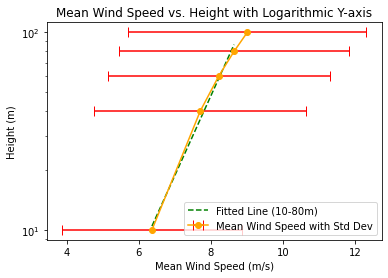

<Figure size 432x288 with 0 Axes>

In [30]:
# Heights corresponding to the wind speed measurements
heights = [10, 40, 60, 80, 100]
heights_for_fit = [10, 40, 60, 80]
#wind_speed_columns = ['wsp_metmast_10m', 'wsp_metmast_40m', 'wsp_metmast_60m', 'wsp_metmast_80m', 'wsp_metmast_100m']


# Calculate the mean wind speed for each height
wind_speeds = [wsp_10m, wsp_40m, wsp_60m, wsp_80m, wsp_100m]
wind_speeds_fit = [wsp_10m, wsp_40m, wsp_60m, wsp_80m]
#mean_wind_speeds = [df_neutral[col].mean() for col in wind_speed_columns]

# # We apply np.log to the heights since we are working in semi-log space (logarithmic y-axis)
# log_heights = np.log(heights_for_fit)
# slope, intercept, r_value, p_value, std_err = linregress(log_heights, wind_speeds_fit)

# # Generate the fitted line
# fitted_line = intercept + slope * np.log(heights_for_fit)


log_heights = np.log10(heights[0:4])

slope, intercept = np.polyfit(wind_speeds[0:4],log_heights,1)

fitted_line = 10**(np.array(wind_speeds[0:4])*slope + intercept)

# Standard deviations corresponding to the heights
std_devs = [std_10m, std_40m, std_60m, std_80m, std_100m]

# Create the plot with error bars for the standard deviation
plt.errorbar(wind_speeds, heights, xerr=std_devs, fmt='o', ecolor='red', linestyle='-', color='orange', capsize=5, label='Mean Wind Speed with Std Dev')

# Plot the fitted line on top (extending the line between 10 m and 80 m)
plt.plot(wind_speeds[0:4], fitted_line, 'g--', label='Fitted Line (10-80m)')

# Set x-axis and y-axis labels
plt.xlabel('Mean Wind Speed (m/s)')
plt.ylabel('Height (m)')
plt.title('Mean Wind Speed vs. Height with Logarithmic Y-axis')

# Apply a logarithmic scale to the y-axis (height)
plt.yscale('log')

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Optionally, save the figure as a PDF
plt.savefig('log_mean_wind_speed_vs_height.pdf')

Find u_star and z0 parameters

In [31]:
z0 = 10**intercept
u_star = k/slope

print(z0)
print(u_star)




0.028310182224525984
0.9922266073487155


In [32]:
u_star_60=wsp_60m*k/np.log(60/z0)
u_star_80=wsp_80m*k/np.log(80/z0)

u_60_to_100= u_star_60/k*np.log(100/z0)
u_80_to_100= u_star_80/k*np.log(100/z0)
  
error_60=100-(u_60_to_100*100/wsp_100m)
error_80=100-(u_80_to_100*100/wsp_100m)

print(f"the difference from 60 to 100 is {error_60} %")
print(f"the difference from 80 to 100 is {error_80} %")

the difference from 60 to 100 is 2.7270862472807806 %
the difference from 80 to 100 is 1.399438395641866 %


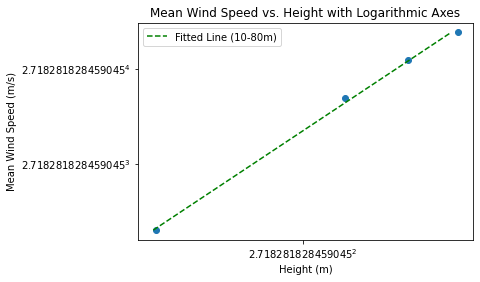

th long-term mean shear exponent is 0.14513700722518294
0.03788945099293911
0.1752977711591582
th long-term mean shear exponent calculated by means 0.1752977711591582
the difference from 60 to 100 is 0.9356287651414021 %
the difference from 60 to 100 is 0.2666590996371525 %
the difference from 60 to 100 is 1.841681731353816 %
the difference from 60 to 100 is 2.529406237278309 %
the difference from 60 to 100 is 0.4703924835251172 %
the difference from 60 to 100 is 1.1488568397308683 %


<Figure size 432x288 with 0 Axes>

In [33]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Heights corresponding to the wind speed measurements
heights = [10, 40, 60, 80, 100]
heights_for_fit = [10, 40, 60, 80]

# Wind speeds corresponding to the heights (replace with your data)
wind_speeds = [wsp_10m, wsp_40m, wsp_60m, wsp_80m, wsp_100m]
wind_speeds_fit = [wsp_10m, wsp_40m, wsp_60m, wsp_80m]

# Standard deviations corresponding to the wind speeds (replace with your data)
std_devs = [std_10m, std_40m, std_60m, std_80m, std_100m]

# Logarithmic transformation of wind speeds and heights
log_heights = np.log(heights_for_fit)
log_wind_speeds_fit = np.log(wind_speeds_fit)

# Perform linear regression in log-log space
slope, intercept = np.polyfit(log_heights, log_wind_speeds_fit, 1)

# Generate the fitted line
fitted_log_wind_speeds = slope * np.log(heights_for_fit) + intercept

# Convert fitted values back to linear scale for plotting
fitted_wind_speeds = np.exp(fitted_log_wind_speeds)

# Create the plot with error bars
#plt.errorbar(heights, wind_speeds, yerr=std_devs, fmt='o', ecolor='red', linestyle='-', color='orange', capsize=5, label='Mean Wind Speed with Std Dev')

# Plot the fitted line
plt.plot( fitted_wind_speeds, heights_for_fit, 'g--', label='Fitted Line (10-80m)')
plt.scatter(wind_speeds_fit,heights_for_fit)
# Set x-axis and y-axis labels
plt.xlabel('Height (m)')
plt.ylabel('Mean Wind Speed (m/s)')
plt.title('Mean Wind Speed vs. Height with Logarithmic Axes')

# Apply a logarithmic scale to both axes
plt.yscale('log', base=math.e)
plt.xscale('log', base=math.e)

# Show the legend
plt.legend()

# Show the plot
plt.show()

# Optionally, save the figure as a PDF
plt.savefig('log_mean_wind_speed_vs_height.pdf')



#############################################  Q2.e ###############################
a_slope=slope
print(f'th long-term mean shear exponent is {a_slope}')



z_ref= (10*40*60*80)**(1/len(heights_for_fit))
z0=z_ref*np.exp(-1/a_slope)

print(z0)
#############################################  Q2.f ###############################

a_means = np.log(wsp_80m/wsp_60m)/np.log(80/60)
print(a_means)
print(f'th long-term mean shear exponent calculated by means {a_means}')
#############################################  Q2.g ###############################

U_100_slope= wsp_80m*(100/80)**a_slope


U_100_means= wsp_80m*(100/80)**a_means


error_slope_exper = np.abs(100 - U_100_slope/wsp_100m*100)

error_means_exper = np.abs(100 - U_100_means/wsp_100m*100)

error_slope_60 = np.abs(100 - U_100_slope/u_60_to_100*100)

error_means_60 = np.abs(100 - U_100_means/u_60_to_100*100)

error_slope_80 = np.abs(100 - U_100_slope/u_80_to_100*100)

error_means_80 = np.abs(100 - U_100_means/u_80_to_100*100)


print(f"the difference from 60 to 100 is {error_slope_exper} %")
print(f"the difference from 60 to 100 is {error_means_exper} %")
print(f"the difference from 60 to 100 is {error_slope_60} %")
print(f"the difference from 60 to 100 is {error_means_60} %")
print(f"the difference from 60 to 100 is {error_slope_80} %")
print(f"the difference from 60 to 100 is {error_means_80} %")



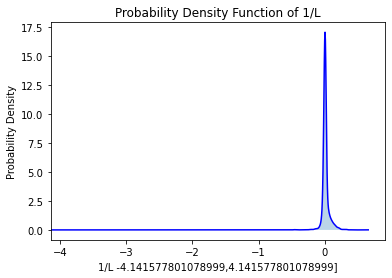

In [34]:
#Calculate std deviation
easterly_Hoe=Hoe[filter_2]

# Extract the data
data = easterly_Hoe['1/L'].dropna()  # Drop any NaN values if they exist

# Create a Gaussian KDE model
kde = gaussian_kde(data)

# Create a range of values for plotting the PDF
x_vals = np.linspace(data.min(), data.max(), 1000)

# Evaluate the PDF for the range of values
pdf_vals = kde(x_vals)

std_gaussian = pdf_vals.std()

limit = 3*std_gaussian

# Plot the PDF
plt.plot(x_vals, pdf_vals, color='blue')
plt.fill_between(x_vals, pdf_vals, alpha=0.3)

# Add labels and a title
plt.xlim(left=-limit)
plt.xlabel(f'1/L -{limit},{limit}]')
plt.ylabel('Probability Density')
plt.title('Probability Density Function of 1/L')
# 
#plt.savefig(f'Plots_new/pdf_{limit}.png')
# Show the plot
plt.show()

Task 3

In [35]:
#Easter wind filter
filter_2 = (Hoe["dir_metmast_60m"] >= 70) & (Hoe["dir_metmast_60m"] <= 110)

# Non-Neutral conditions filters (positive and negative ranges)
filter_3 = (Hoe["1/L"] < limit) & (Hoe["1/L"] > 0.0005) # Filter for stable (rightest part)
filter_4 = (Hoe["1/L"] > -limit) & (Hoe["1/L"] < -0.0005) # Filter for unstable (leftest part)
filter_5 = (Hoe["1/L"] > -limit) & (Hoe["1/L"] < limit) # Filter for all

# Filter to get the two data subsets
filtered_Hoe_stable = Hoe[(filter_2 & filter_3)]
filtered_Hoe_unstable = Hoe[(filter_2 & filter_4)]
filtered_Hoe_all = Hoe[(filter_2 & filter_5)]


a)

44867


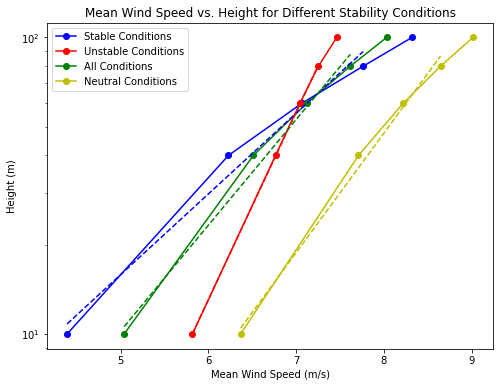

[10, 40, 60, 80, 100]


In [36]:
# Mean for stable conditions
wsp_10m_stable = filtered_Hoe_stable["wsp_metmast_10m"].mean()
wsp_40m_stable = filtered_Hoe_stable["wsp_metmast_40m"].mean()
wsp_60m_stable = filtered_Hoe_stable["wsp_metmast_60m"].mean()
wsp_80m_stable = filtered_Hoe_stable["wsp_metmast_80m"].mean()
wsp_100m_stable = filtered_Hoe_stable["wsp_metmast_100m"].mean()

wind_speeds_stable = [wsp_10m_stable, wsp_40m_stable, wsp_60m_stable, wsp_80m_stable, wsp_100m_stable]

# Mean for unstable conditions
wsp_10m_unstable = filtered_Hoe_unstable["wsp_metmast_10m"].mean()
wsp_40m_unstable = filtered_Hoe_unstable["wsp_metmast_40m"].mean()
wsp_60m_unstable = filtered_Hoe_unstable["wsp_metmast_60m"].mean()
wsp_80m_unstable = filtered_Hoe_unstable["wsp_metmast_80m"].mean()
wsp_100m_unstable = filtered_Hoe_unstable["wsp_metmast_100m"].mean()

wind_speeds_unstable = [wsp_10m_unstable, wsp_40m_unstable, wsp_60m_unstable, wsp_80m_unstable, wsp_100m_unstable]

# Mean for all conditions
wsp_10m_all = filtered_Hoe_all["wsp_metmast_10m"].mean()
wsp_40m_all = filtered_Hoe_all["wsp_metmast_40m"].mean()
wsp_60m_all = filtered_Hoe_all["wsp_metmast_60m"].mean()
wsp_80m_all = filtered_Hoe_all["wsp_metmast_80m"].mean()
wsp_100m_all = filtered_Hoe_all["wsp_metmast_100m"].mean()

print(len(Hoe["wsp_metmast_10m"]))

wind_speeds_all = [wsp_10m_all, wsp_40m_all, wsp_60m_all, wsp_80m_all, wsp_100m_all]

# Heights corresponding to the wind speed measurements
heights = [10, 40, 60, 80, 100]

# Convert heights to log10 scale for the first 4 points (common for all)
log_heights = np.log10(heights[0:4])

# Fit trendlines for each condition using the same log_heights

# Stable condition
slope_stable, intercept_stable = np.polyfit(wind_speeds_stable[0:4], log_heights, 1)
fitted_line_stable = 10**(np.array(wind_speeds_stable[0:4]) * slope_stable + intercept_stable)

# Unstable condition
slope_unstable, intercept_unstable = np.polyfit(wind_speeds_unstable[0:4], log_heights, 1)
fitted_line_unstable = 10**(np.array(wind_speeds_unstable[0:4]) * slope_unstable + intercept_unstable)

# All conditions
slope_all, intercept_all = np.polyfit(wind_speeds_all[0:4], log_heights, 1)
fitted_line_all = 10**(np.array(wind_speeds_all[0:4]) * slope_all + intercept_all)

# Neutral condition
slope_neutral, intercept_neutral = np.polyfit(wind_speeds[0:4], log_heights, 1)
fitted_line_neutral = 10**(np.array(wind_speeds[0:4]) * slope_neutral + intercept_neutral)



# Create the plot
plt.figure(figsize=(8, 6))

# Plot wind speed profiles for stable, unstable, and all conditions
plt.plot(wind_speeds_stable, heights, 'b-', label='Stable Conditions', marker='o')
plt.plot(wind_speeds_unstable, heights, 'r-', label='Unstable Conditions', marker='o')
plt.plot(wind_speeds_all, heights, 'g-', label='All Conditions', marker='o')
plt.plot(wind_speeds, heights, 'y-', label='Neutral Conditions', marker='o')

# Plot trendlines for each condition
plt.plot(wind_speeds_stable[:-1], fitted_line_stable, 'b--')
plt.plot(wind_speeds_unstable[:-1], fitted_line_unstable, 'r--')
plt.plot(wind_speeds_all[:-1], fitted_line_all, 'g--')
plt.plot(wind_speeds[:-1], fitted_line_neutral, 'y--')

# Set x-axis and y-axis labels
plt.xlabel('Mean Wind Speed (m/s)')
plt.ylabel('Height (m)')
plt.title('Mean Wind Speed vs. Height for Different Stability Conditions')

# Apply a logarithmic scale to the y-axis (height)
plt.yscale('log')

# Show the legend to distinguish different profiles
plt.legend()

#plt.savefig(f'Plots_new/log_mean_wind_speed_vs_height_{limit}.png')
# Show the plot
plt.show()

# Optionally, save the figure as a PDF file
print(heights)


In [37]:
wind_speeds

[6.3686867509025245,
 7.710693682310472,
 8.220895703971122,
 8.64610729241877,
 9.015054620938631]

## Task 4

In [38]:
heights

[10, 40, 60, 80, 100]

Slopes for stable condition: [0.06125517332414976, 0.04185667768595236, 0.034897477789255046, 0.02782631869834753]
Slopes for unstable condition: [0.03152607253797533, 0.013910051971326132, 0.010524312596005813, 0.010479520737327653]
Slopes for neutral condition: [0.04473356438026492, 0.025510101083032487, 0.021260579422382443, 0.01844736642599303]
[[1.00801849 0.32658068 0.4353861 ]
 [2.75518314 0.57638062 0.9931463 ]
 [3.44564885 0.65413233 1.24155912]
 [3.66329141 0.86846442 1.436367  ]]
0.30650613437195756


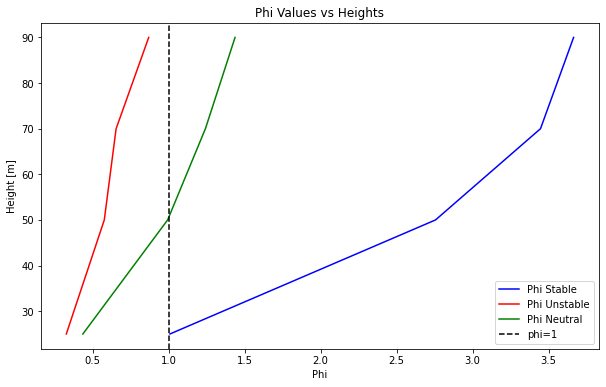

In [40]:
wind_speeds_stable
wind_speeds_unstable
wind_speeds_neutral=wind_speeds
heights


def calculate_slope(heights, wind_speeds):
    # Ensure heights and wind_speeds are of the same length
    if len(heights) != len(wind_speeds):
        raise ValueError("Heights and wind speeds must have the same length")
    
    slopes = []
    # Iterate through the list of heights and wind speeds to calculate slopes
    for i in range(1, len(heights)):
        delta_y = heights[i] - heights[i - 1]  # Change in heights
        delta_x = wind_speeds[i] - wind_speeds[i - 1]  # Change in wind speed
        if delta_x == 0:
            slope = float('inf')  # Handle division by zero (e.g., no change in wind speed)
        else:
            slope = delta_x / delta_y
        slopes.append(slope)
    
    return slopes

# Calculate slopes for each wind speed condition
slopes_stable = calculate_slope(heights, wind_speeds_stable)
slopes_unstable = calculate_slope(heights, wind_speeds_unstable)
slopes_neutral = calculate_slope(heights, wind_speeds_neutral)

# Output the results
print("Slopes for stable condition:", slopes_stable)
print("Slopes for unstable condition:", slopes_unstable)
print("Slopes for neutral condition:", slopes_neutral)



phi_to_plot=[]
for i in range(0,len(slopes_stable)):
    phi_stable=slopes_stable[i] * k * heights[i] / (filtered_Hoe_stable["u_star_2d"].mean())
    phio_unstable=slopes_unstable[i] * k * heights[i]  / (filtered_Hoe_unstable["u_star_2d"].mean())
    phi_neutral=slopes_neutral[i] * k * heights[i] / (filtered_Hoe["u_star_2d"].mean())

    phi_to_plot.append([phi_stable, phio_unstable, phi_neutral])


phi_to_plot = np.array(phi_to_plot)

print(phi_to_plot)
print(easterly_Hoe["u_star_2d"].mean())

mean_heights=[25,50,70,90]



# Extract the individual columns from phi_to_plot
phi_stable = phi_to_plot[:, 0]
phi_unstable = phi_to_plot[:, 1]
phi_neutral = phi_to_plot[:, 2]

# Create a single plot
plt.figure(figsize=(10, 6))

# Plot each phi type with different colors and labels
plt.plot(phi_stable, mean_heights, label='Phi Stable', color='b')
plt.plot(phi_unstable, mean_heights,  label='Phi Unstable', color='r')
plt.plot(phi_neutral, mean_heights, label='Phi Neutral', color='g')

plt.axvline(x=1, color='black', linestyle='--', linewidth=1.5, label='phi=1')

# Add titles and labels
plt.title('Phi Values vs Heights')
plt.xlabel('Phi')
plt.ylabel('Height [m]')
plt.legend()  # To show the labels for each line

# # Show the plot
plt.show()

Task 6

In [41]:
phi_neutral

array([0.4353861 , 0.9931463 , 1.24155912, 1.436367  ])

In [468]:
stable = easterly_Hoe.loc[easterly_Hoe["1/L"] > 0.0005]
unstable = easterly_Hoe.loc[easterly_Hoe["1/L"] < -0.0005]

per_stable = len(stable)/len(easterly_Hoe)
per_unstable = len(unstable)/len(easterly_Hoe)

print(per_stable)
print(per_unstable)

0.5655306718597858
0.3805258033106134


In [469]:

easterly_Hoe

,timestamp,u_star_2d,wsc,dir_metmast_60m,T_10m,wsp_metmast_10m,wsp_metmast_40m,wsp_metmast_60m,wsp_metmast_80m,wsp_metmast_100m,T_10m_K,1/L
70,200801011230,0.235,-0.0050,72.9712,3.199630,3.74567,4.50373,4.75768,4.99348,5.36262,276.349630,0.005471
77,200801011340,0.232,-0.0050,76.3581,3.226040,4.26994,5.13925,5.60008,5.78006,6.02288,276.376040,0.005685
78,200801011350,0.273,-0.0046,79.2801,3.174060,4.56627,5.72742,6.12323,6.51866,6.91794,276.324060,0.003211
79,200801011400,0.299,-0.0030,74.8758,3.165750,5.44514,6.25513,6.57119,6.84969,7.02042,276.315750,0.001594
80,200801011410,0.262,-0.0047,74.6102,3.184210,4.86455,5.90241,6.18732,6.33452,6.69739,276.334210,0.003711
...,...,...,...,...,...,...,...,...,...,...,...,...
44779,200812301950,0.157,0.0038,95.7184,-0.469200,2.34476,2.51228,2.55627,2.51865,2.63961,272.680800,-0.014131
44780,200812302000,0.164,0.0046,98.8727,-0.436749,2.42876,2.69846,2.67217,2.49036,2.47664,272.713251,-0.015005
44781,200812302010,0.104,0.0031,95.2321,-0.415630,2.11304,2.37865,2.38552,2.28557,2.30072,272.734370,-0.039651
44782,200812302020,0.135,0.0052,108.7880,-0.426659,2.66386,2.73001,2.67729,2.49020,2.43152,272.723341,-0.030409


In [470]:
stable

,timestamp,u_star_2d,wsc,dir_metmast_60m,T_10m,wsp_metmast_10m,wsp_metmast_40m,wsp_metmast_60m,wsp_metmast_80m,wsp_metmast_100m,T_10m_K,1/L
70,200801011230,0.235,-0.0050,72.9712,3.199630,3.74567,4.50373,4.75768,4.99348,5.36262,276.349630,0.005471
77,200801011340,0.232,-0.0050,76.3581,3.226040,4.26994,5.13925,5.60008,5.78006,6.02288,276.376040,0.005685
78,200801011350,0.273,-0.0046,79.2801,3.174060,4.56627,5.72742,6.12323,6.51866,6.91794,276.324060,0.003211
79,200801011400,0.299,-0.0030,74.8758,3.165750,5.44514,6.25513,6.57119,6.84969,7.02042,276.315750,0.001594
80,200801011410,0.262,-0.0047,74.6102,3.184210,4.86455,5.90241,6.18732,6.33452,6.69739,276.334210,0.003711
...,...,...,...,...,...,...,...,...,...,...,...,...
44711,200812300830,0.083,-0.0031,106.5600,-0.558787,2.24740,4.71803,4.87672,4.89561,4.93265,272.591213,0.078045
44712,200812300840,0.075,-0.0023,109.9260,-0.636697,2.24586,4.62261,4.96183,5.01527,5.19574,272.513303,0.078503
44746,200812301420,0.128,-0.0002,99.0207,0.428162,2.46237,3.17102,3.47651,3.72228,3.87280,273.578162,0.001368
44747,200812301430,0.120,-0.0007,100.6060,0.400819,2.41087,3.19598,3.53740,3.68049,3.78452,273.550819,0.005811


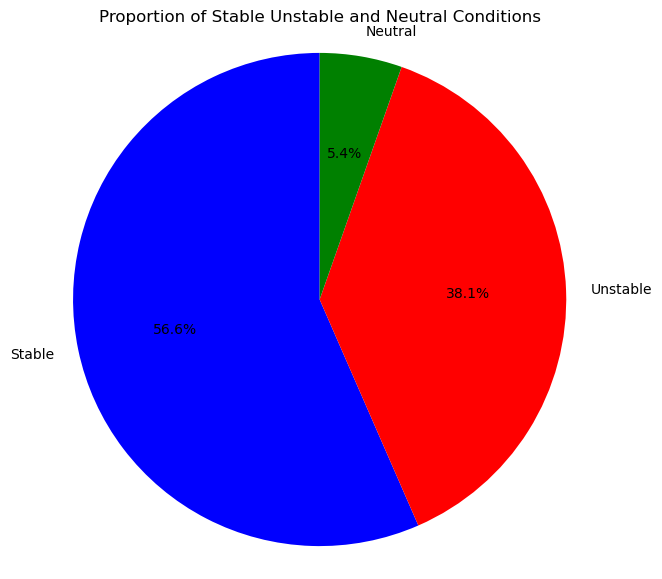

In [471]:
labels = ['Stable', 'Unstable', 'Neutral']
sizes = [per_stable * 100, per_unstable * 100, (1-per_stable-per_unstable)*100]  # Convert to percentage

# Create pie chart
plt.figure(figsize=(7, 7))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=90, colors=['b', 'r', 'g'])
plt.title('Proportion of Stable Unstable and Neutral Conditions')
plt.axis('equal')  # Equal aspect ratio ensures that pie chart is drawn as a circle

# Show plot
plt.show()

Task 7

th long-term mean shear exponent calculated by means 0.22597946283512532
th long-term mean shear exponent calculated by means 0.23486386508059687


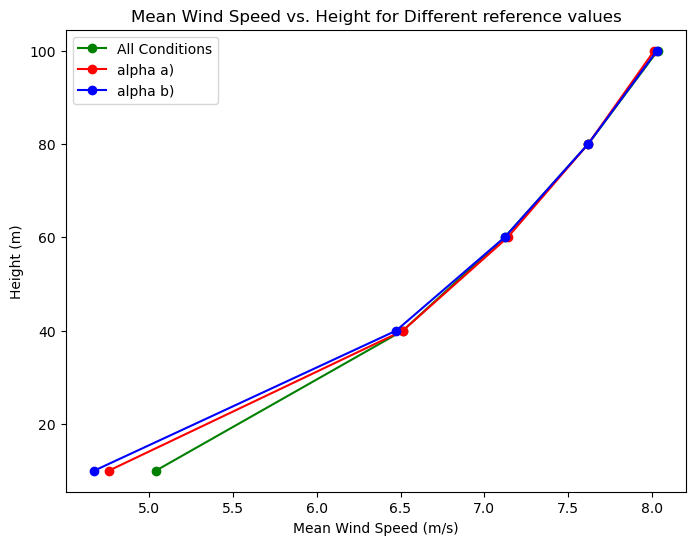

[10, 40, 60, 80, 100]


In [472]:
# Power-law to calculate 40-80 (40 as ref) and 60-80 (80 as ref)

wsp_all_10m = easterly_Hoe["wsp_metmast_10m"].mean()
wsp_all_40m = easterly_Hoe["wsp_metmast_40m"].mean()
wsp_all_60m = easterly_Hoe["wsp_metmast_60m"].mean()
wsp_all_80m = easterly_Hoe["wsp_metmast_80m"].mean()
wsp_all_100m = easterly_Hoe["wsp_metmast_100m"].mean()

a_1 = np.log(wsp_all_80m/wsp_all_40m)/np.log(80/40)
print(f'th long-term mean shear exponent calculated by means {a_1}')

a_2 = np.log(wsp_all_80m/wsp_all_60m)/np.log(80/60)
print(f'th long-term mean shear exponent calculated by means {a_2}')

u_list_a1 = []
for height in heights:
    U = wsp_all_40m*(height/40)**a_1
    u_list_a1.append(U)

u_list_a2 = []
for height in heights:
    U = wsp_all_80m*(height/80)**a_2
    u_list_a2.append(U)


# Create the plot
plt.figure(figsize=(8, 6))

# Plot wind speed profiles for stable, unstable, and all conditions
plt.plot(wind_speeds_all, heights, 'g-', label='All Conditions', marker='o')
plt.plot(u_list_a1, heights, 'r-', label='alpha a)', marker='o')
plt.plot(u_list_a2, heights, 'b-', label='alpha b)', marker='o')



# Set x-axis and y-axis labels
plt.xlabel('Mean Wind Speed (m/s)')
plt.ylabel('Height (m)')
plt.title('Mean Wind Speed vs. Height for Different reference values')

# Apply a logarithmic scale to the y-axis (height)
#plt.yscale('log')

# Show the legend to distinguish different profiles
plt.legend()

#plt.savefig(f'Plots_new/log_mean_wind_speed_vs_height_{limit}.png')
# Show the plot
plt.show()

# Optionally, save the figure as a PDF file
print(heights)


Question 8